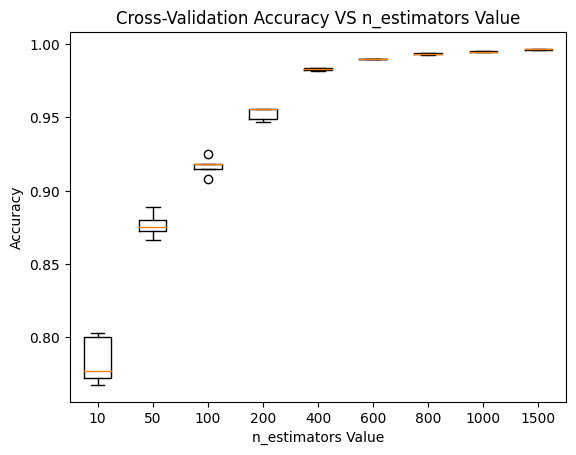

Best n_estimators: 1500
Accuracy using entire training set and best n_estimators: 99.63875903102422%



In [10]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('clean_mushroom_data.csv')
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

n_estimators_list = [10, 50, 100, 200, 400, 600, 800, 1000, 1500]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_fold_accuracies = []

for n_estimators_value in n_estimators_list:
    
    fold_accuracies = []
    
    for train_index, val_index in kf.split(X_train):
        
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        gbc = GradientBoostingClassifier(n_estimators=n_estimators_value, random_state=42)
        gbc.fit(X_train_fold, y_train_fold)
        
        prediction = gbc.predict(X_val_fold)
        
        fold_accuracy = accuracy_score(y_val_fold, prediction)
        fold_accuracies.append(fold_accuracy)
    
    all_fold_accuracies.append(fold_accuracies)
    
all_fold_accuracies = np.array(all_fold_accuracies)

#  - Box plot to show the cross-validation results

plt.boxplot(all_fold_accuracies.T, labels=n_estimators_list)
plt.title('Cross-Validation Accuracy VS n_estimators Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy')
plt.savefig('n_estimators_accuracy.png', bbox_inches='tight')
plt.show()

#  - Train a classifier using the entire training set and the best n_estimators

mean_acc = np.mean(all_fold_accuracies, axis=1)
best = np.argmax(mean_acc)
best_n_estimators = n_estimators_list[best]

print("Best n_estimators: " + str(best_n_estimators))

gbc = GradientBoostingClassifier(n_estimators=best_n_estimators, random_state=42)
gbc.fit(X_train, y_train)

#  - test the classifier on test set

prediction = gbc.predict(X_test)
GBC_accuracy = accuracy_score(y_test, prediction)

print("Accuracy using entire training set and best n_estimators: " + str(GBC_accuracy * 100) + "%\n")
